In [1]:
!pip install deap matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 2.1 MB/s eta 0:00:00


Поколение 0: t = 3.0420, f(t) = -3.9982
Поколение 1: t = 3.0420, f(t) = -3.9982
Поколение 2: t = 3.0420, f(t) = -3.9982
Поколение 3: t = 3.0420, f(t) = -3.9982
Поколение 4: t = 3.0420, f(t) = -3.9982
Поколение 5: t = 3.0420, f(t) = -3.9982
Поколение 6: t = 3.0420, f(t) = -3.9982
Поколение 7: t = 3.0420, f(t) = -3.9982
Поколение 8: t = 3.0420, f(t) = -3.9982
Поколение 9: t = 3.0420, f(t) = -3.9982
Поколение 10: t = 3.0420, f(t) = -3.9982
Поколение 11: t = 3.0420, f(t) = -3.9982
Поколение 12: t = 3.0420, f(t) = -3.9982
Поколение 13: t = 3.0420, f(t) = -3.9982
Поколение 14: t = 3.0420, f(t) = -3.9982
Поколение 15: t = 3.0420, f(t) = -3.9982
Поколение 16: t = 3.0420, f(t) = -3.9982
Поколение 17: t = 3.0420, f(t) = -3.9982
Поколение 18: t = 3.0420, f(t) = -3.9982
Поколение 19: t = 3.0420, f(t) = -3.9982
Поколение 20: t = 3.0420, f(t) = -3.9982
Поколение 21: t = 3.0420, f(t) = -3.9982
Поколение 22: t = 3.0420, f(t) = -3.9982
Поколение 23: t = 3.0420, f(t) = -3.9982
Поколение 24: t = 3.0420, 

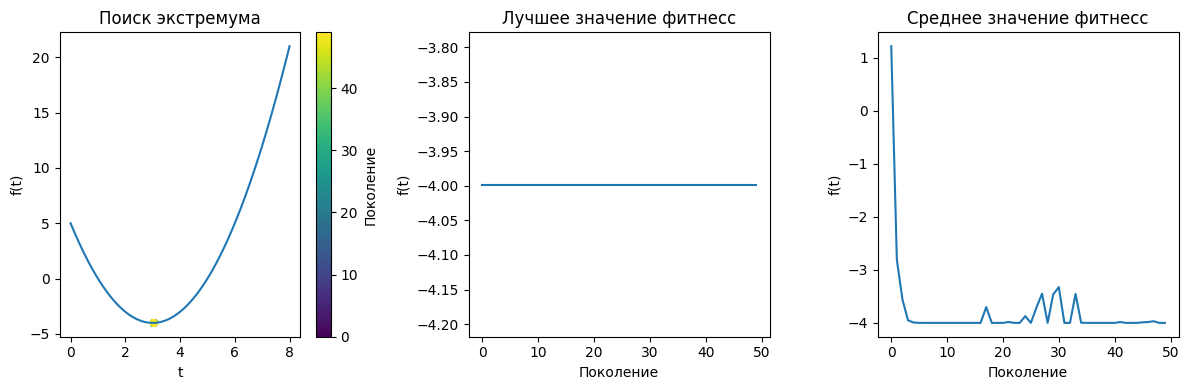

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools



T_MIN = 0
T_MAX = 8

POP_SIZE = 30
BITS = 10                 # длина бинарной строки
CXPB = 0.8                # вероятность кроссинговера
MUTPB = 0.02              # вероятность мутации
NGEN = 50                 # число поколений



def f(t):
    return t**2 - 6*t + 5



def decode(individual):
    decimal = int("".join(map(str, individual)), 2)
    t = T_MIN + decimal * (T_MAX - T_MIN) / (2**BITS - 1)
    return t



def fitness_function(individual):
    t = decode(individual)
    return (f(t),)



creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, BITS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / BITS)
toolbox.register("select", tools.selTournament, tournsize=3)



population = toolbox.population(n=POP_SIZE)

best_history = []
avg_history = []
x_history = []

for gen in range(NGEN):
    # Оценка фитнеса
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Сбор статистики
    fits = [ind.fitness.values[0] for ind in population]
    best_history.append(min(fits))
    avg_history.append(sum(fits) / len(fits))

    best_ind = tools.selBest(population, 1)[0]
    best_t = decode(best_ind)
    x_history.append(best_t)

    print(f"Поколение {gen}: t = {best_t:.4f}, f(t) = {f(best_t):.4f}")

    # Отбор
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Кроссинговер
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Мутация
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    population[:] = offspring



t_vals = np.linspace(T_MIN, T_MAX, 400)
y_vals = f(t_vals)

plt.figure(figsize=(12, 4))

# График функции + движение особей
plt.subplot(1, 3, 1)
plt.plot(t_vals, y_vals, label="f(t)")
plt.scatter(x_history, f(np.array(x_history)),
            c=range(NGEN), cmap="viridis", s=20)
plt.title("Поиск экстремума")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.colorbar(label="Поколение")

# Лучшее значение
plt.subplot(1, 3, 2)
plt.plot(best_history)
plt.title("Лучшее значение фитнесс")
plt.xlabel("Поколение")
plt.ylabel("f(t)")

# Среднее значение
plt.subplot(1, 3, 3)
plt.plot(avg_history)
plt.title("Среднее значение фитнесс")
plt.xlabel("Поколение")
plt.ylabel("f(t)")

plt.tight_layout()
plt.show()
